In [1]:
%matplotlib notebook
import numpy as np
from gf321_utils import bvh_utils
from gf321_utils import plot_utils

In [2]:
bvh_data = bvh_utils.BVHData()
bvh_data.bvhRead('neural_lbs_data/dog1_trot_skeleton.bvh')

Reading BVH File.. neural_lbs_data/dog1_trot_skeleton.bvh
Done


In [3]:
joints, names = bvh_data.getJointAngles(withNames=True)

In [4]:
offsets, hierarchy = bvh_data.get_offsets_and_hierarchy()

In [5]:
bvh_data.totalJoints

43

In [6]:
offsets.shape

(43, 3)

In [7]:
joint_angs = joints[0][:,:3,:3]

In [8]:
print(joint_angs.shape)
print(offsets.shape)
print(len(hierarchy))

(43, 3, 3)
(43, 3)
43


In [9]:
joints_local = bvh_utils.make_joints_local(joints)

<IPython.core.display.Javascript object>


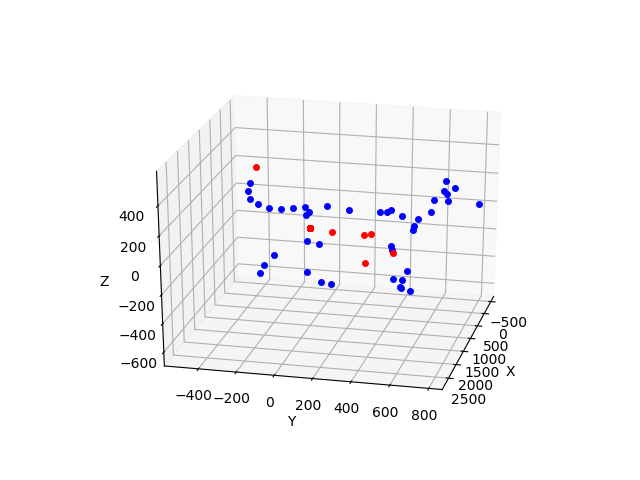

In [130]:
joint_pos = joints[:,:,:,3]
joints_4 = np.zeros((joints.shape[0],joints.shape[1],4,4))
joints_4[:,:,:3,:3] = joints[:,:,:3,:3]
joints_4[:,:,:3,3] = offsets
joints_4[:,:,3,3] = 1
joints_4[:,0,:3,3] = joints[:,0,:3,3] #set global root position
root = joints_4[:,0]
#
joint_pos = joints_local[:,:,:,3] ##

##############

offsets_fr = np.zeros((joints.shape[0],43,3))
offsets_fr[:] = offsets


joints_4 = np.zeros((joints.shape[0],joints.shape[1],4,4))
joints_4[:,:,:3,:3] = joints_local[:,:,:3,:3]
joints_4[:,:,:3,3] = offsets
joints_4[:,:,3,3] = 1
joints_4[:,0,:3,3] = joints_local[:,0,:3,3] #set global root position

jt1 = np.zeros((joints.shape[0],4,4))

constr_jts = np.zeros((joints.shape[0],joints.shape[1],3))
constr_jts[:,0] = root[:,:3,3]
    
for fr in range(joints.shape[0]):
    jt1[fr] = np.matmul(joints_4[fr,0],joints_4[fr,1])
    
jt2 = np.zeros((joints.shape[0],4,4))

for fr in range(joints.shape[0]):
    jt2[fr] = np.matmul(jt1[fr],joints_4[fr,2])
    
jt3 = np.zeros((joints.shape[0],4,4))

for fr in range(joints.shape[0]):
    jt3[fr] = np.matmul(jt2[fr],joints_4[fr,3])
    
jt4 = np.zeros((joints.shape[0],4,4))

for fr in range(joints.shape[0]):
    jt4[fr] = np.matmul(jt3[fr],joints_4[fr,4])
    
jt5 = np.zeros((joints.shape[0],4,4))

for fr in range(joints.shape[0]):
    jt5[fr] = np.matmul(jt4[fr],joints_4[fr,5])
    
jt1_pos = jt1[:,:3,3]
root_pos = root[:,:3,3]
jt2_pos = jt2[:,:3,3]
jt3_pos = jt3[:,:3,3]
jt4_pos = jt4[:,:3,3]
jt5_pos = jt5[:,:3,3]
   
constr_jts = np.zeros((joints.shape[0],joints.shape[1],4))
constr_jts[:,:,3] = 1
constr_jts[:,0,:3] = root_pos
constr_jts[:,1,:3]= jt1_pos
constr_jts[:,2,:3]= jt2_pos
constr_jts[:,3,:3]= jt3_pos
constr_jts[:,4,:3]= jt4_pos
constr_jts[:,5,:3]= jt5_pos


#for fr in range(joints.shape[0]):
    #for jt in range(joints.shape[1]):
        #constr_jts[fr,jt] = np.matmul(root[fr],constr_jts[fr,jt])

ani = plot_utils.AnimatePlot()
ani.animated_plot(joint_pos,constr_jts[:,:,:3],fps=10, offset=True)

<IPython.core.display.Javascript object>


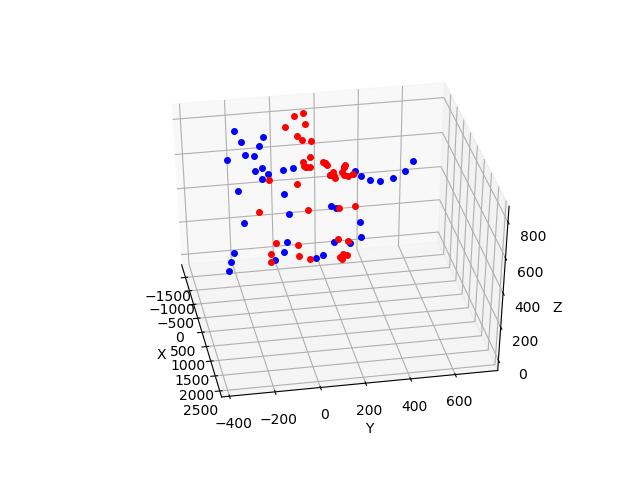

In [164]:
#FIGURED IT OUT YES

offset_tr = np.zeros((joints.shape[1],4,4))
offset_tr[:,:3,:3] = np.identity(3)
offset_tr[:,:3,3] = offsets
offset_tr[:,3,3] = 1

joint_pos = joints[:,:,:3,3]

trans = np.zeros((joints.shape[0],joints.shape[1],4,4))
trans[:,:,:3,:3] = joints[:,:,:3,:3]
#trans[:,:,:3,3] = offsets
trans[:,:,3,3] = 1
trans[:,0,:3,3] = joints[:,0,:3,3] #set global root position

constr_jts = np.zeros((joints.shape[0],joints.shape[1],3))
constr_jts[:,0] = root[:,:3,3]
    
for fr in range(joints.shape[0]):
    trans[fr,1,:3,3] = np.matmul(trans[fr,0],offset_tr[1])[:3,3]


for fr in range(joints.shape[0]):
    trans[fr,2,:3,3] = np.matmul(trans[fr,1],offset_tr[2])[:3,3]
    

for fr in range(joints.shape[0]):
    trans[fr,3,:3,3] = np.matmul(trans[fr,2],offset_tr[3])[:3,3]

for fr in range(joints.shape[0]):
    trans[fr,4,:3,3] = np.matmul(trans[fr,3],offset_tr[4])[:3,3]
    
for fr in range(joints.shape[0]):
    trans[fr,5,:3,3] = np.matmul(trans[fr,4],offset_tr[5])[:3,3]
    
for fr in range(joints.shape[0]):
    trans[fr,6,:3,3] = np.matmul(trans[fr,5],offset_tr[6])[:3,3]

for fr in range(joints.shape[0]):
    trans[fr,7,:3,3] = np.matmul(trans[fr,6],offset_tr[7])[:3,3]
    
for fr in range(joints.shape[0]):
    trans[fr,8,:3,3] = np.matmul(trans[fr,7],offset_tr[8])[:3,3]

constr_jts[:,:] = trans[:,:,:3,3]


ani = plot_utils.AnimatePlot()
ani.animated_plot(joint_pos,constr_jts[:,:,:3],fps=10)#, offset=True)

<IPython.core.display.Javascript object>


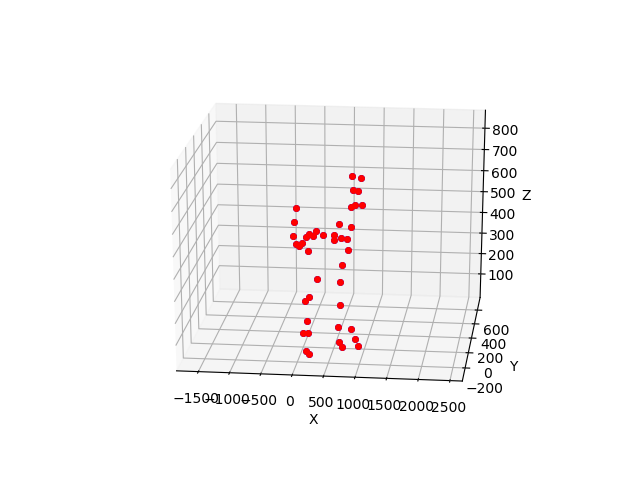

In [11]:
test_pos = bvh_data.get_pos_from_angs()
ani = plot_utils.AnimatePlot()
ani.animated_plot(joints[:,:,:3,3],test_pos,fps=10)

In [115]:
def pos_from_angs(angles, offsets, hierarchy, root_pos=[0,0,0]):
    
    pos = np.zeros((angles.shape[0],3)) #initialise positions to be set
    pos[0] = root_pos #set root position from argument
    
    #Function to perform recursion on hierarchy
    def build_from_joint(base_index):
        to_build = hierarchy[base_index] #get list of joint indices to build
        for ind in to_build:
            pos[ind] = pos[base_index] + np.matmul(angles[ind],offsets[ind])
            build_from_joint(ind)
    
    build_from_joint(0) #start build
    
    return pos

root_pos = joints[:,0,:,3]
pos = np.zeros((joints.shape[0],joints.shape[1],3))
for fr in range(joints.shape[0]):
    pos[fr] = pos_from_angs(joints[fr][:,:,:3], offsets, hierarchy, root_pos[fr])

minmaxs are:  -1731.93 -1565.93 -260.97310000000004 1109.939 13.338600000000106 863.4426000000001


<IPython.core.display.Javascript object>


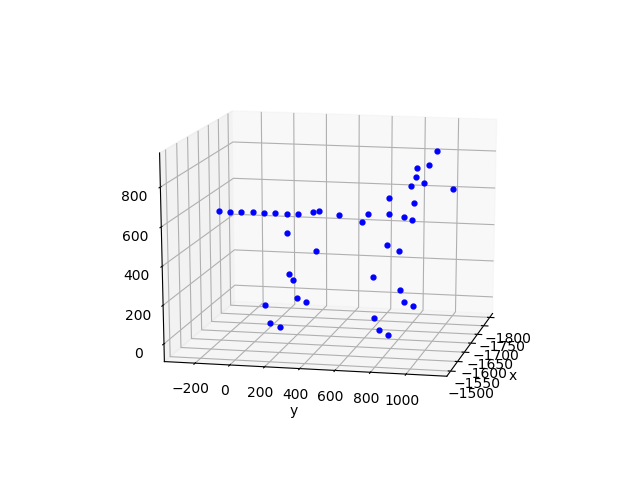

In [116]:
#Neutral pose test

zero_angles = np.zeros_like(joints[:,:,:3,:3])
zero_angles[:,:] = np.identity(3)
for fr in range(joints.shape[0]):
    pos[fr] = pos_from_angs(zero_angles[fr], offsets, hierarchy, root_pos[fr])

plot_utils.plot(pos,0)

In [11]:
neutral = bvh_data.getJointAngles(get_neutral_frame=True)
neutral_ang = np.array([neutral[:,:,:3]])

zero_ang = np.zeros((1,43,3,3))
for jt in range(43):
    zero_ang[0][jt] = np.identity(3)
    
#zero_ang[0][1] = np.array([[1,0,0],[0,0,-1],[0,1,0]])
fk_neutral = bvh_data.get_pos_from_angs(all_joint_angles=neutral_ang, root_trans=neutral)
plot_utils.plot(fk_neutral,0)
fk_pos[0].shape

IndexError: index 1 is out of bounds for axis 0 with size 1

In [11]:
fk_pos = bvh_data.get_pos_from_angs()
joint_pos = bvh_data.getJointAngles()[:,:,:,3]

minmaxs are:  -1770.4337680948101 -954.2790293314154 -178.79446767469724 696.1103375148007 -42.00815234607873 799.8065775482021


<IPython.core.display.Javascript object>


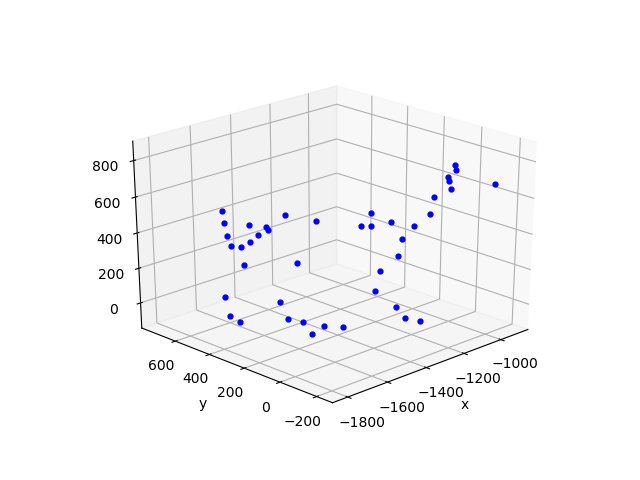

minmaxs are:  -1752.2384738391288 -991.6872155676351 -207.1818865446208 736.8484662008632 17.11025729802717 807.2084797690859


<IPython.core.display.Javascript object>


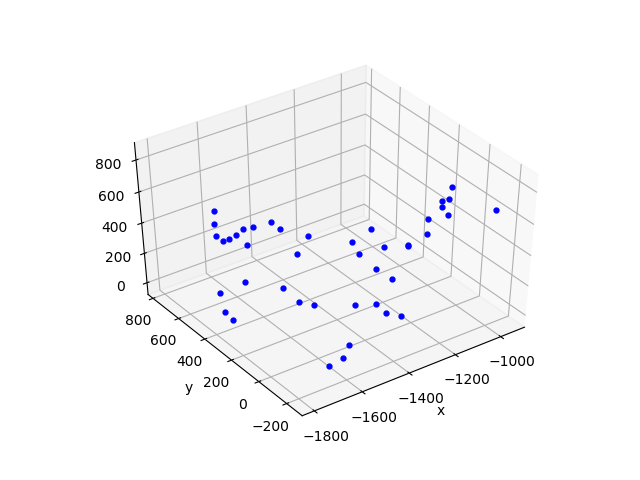

In [87]:
plot_utils.plot(fk_pos,9)
plot_utils.plot(joint_pos,9)

<IPython.core.display.Javascript object>


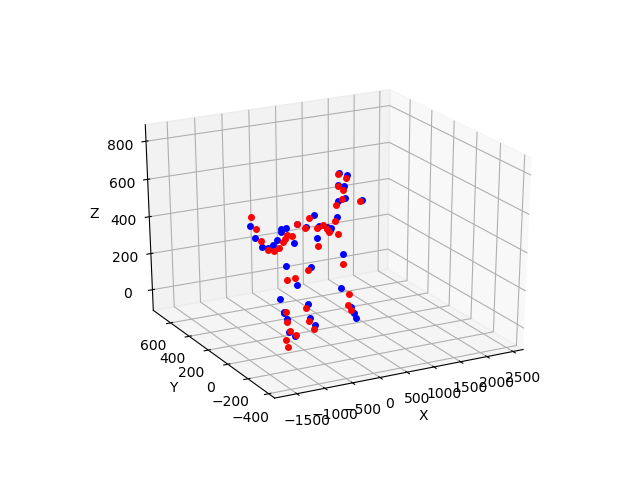

In [138]:
ani = plot_utils.AnimatePlot()
ani.animated_plot(joint_pos,fk_pos,fps=2)

(43, 3, 4)

<IPython.core.display.Javascript object>


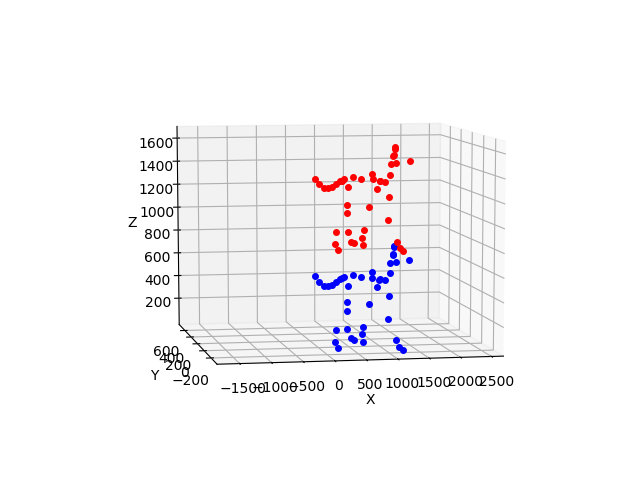

In [132]:
#Confirms I understand the joints data... not sure I do tbh
vec = np.array([0,800,0])
gt = np.zeros((joints.shape[0],joints.shape[1],3))
off = np.zeros((joints.shape[0],joints.shape[1],3))
for fr in range(joints.shape[0]):
    for jt in range(joints.shape[1]):
        off[fr][jt] = vec + joints[fr][jt][:,3]  #or np.matmul(joints[fr][0][:,:3],vec)
        gt[fr][jt] = joints[fr][jt][:3,3]
ani = plot_utils.AnimatePlot()
ani.animated_plot(gt,off, fps=60)

<IPython.core.display.Javascript object>


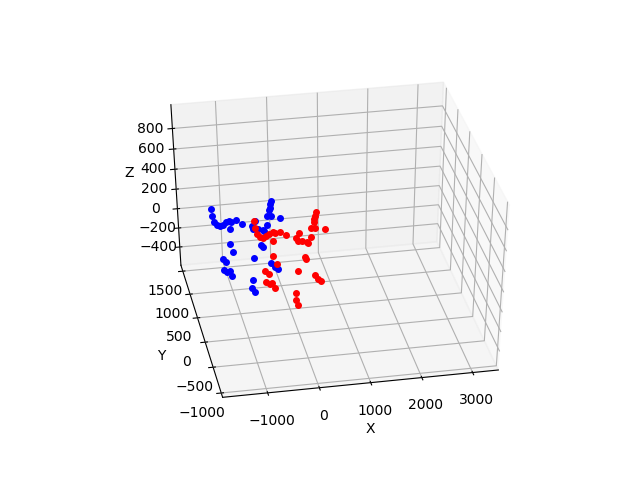

In [23]:
vec = np.array([0,0,800])
gt = np.zeros((joints.shape[0],joints.shape[1],3))
off = np.zeros((joints.shape[0],joints.shape[1],3))
for fr in range(joints.shape[0]):
    for jt in range(joints.shape[1]):
        off[fr][jt] = np.matmul(joints[fr][0][:,:3],vec) + joints[fr][jt][:,3] 
        gt[fr][jt] = joints[fr][jt][:3,3]
ani = plot_utils.AnimatePlot()
ani.animated_plot(gt,off, fps=60)

<IPython.core.display.Javascript object>


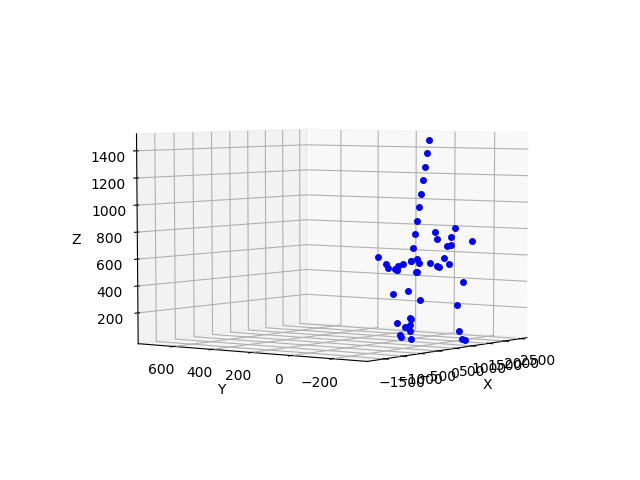

In [123]:
jtc = 0
ani_data = np.zeros((joints.shape[0],joints.shape[1]+10,3))
ani_data[:,:joints.shape[1],:] = joints[:,:,:,3]

vecs = np.zeros((ani_data.shape[1]-joints.shape[1],4))
offset = 100
for ind in range(vecs.shape[0]):
    vecs[ind] = [0,ind*offset,0,1]

for fr in range(joints.shape[0]):
    for ind in range(vecs.shape[0]):
        ani_data[fr][joints.shape[1]+ind] = np.matmul(joints[fr][jtc],vecs[ind])

ani = plot_utils.AnimatePlot()
ani.animated_plot(ani_data,fps=10)

In [112]:
bvh_data.root.childNodes[0].childNodes[0].childNodes[0].childNodes[0].childNodes[0].childNodes[0].childNodes[0].childNodes[0].offset

[0.0, -20.5704, 56.3636]

In [59]:
get_index(bvh_data.root.childNodes[-1].childNodes[-1].childNodes[-1].childNodes[-1].childNodes[-1].childNodes[-1])

40